In [2]:
print('aaa')




aaa


# Upload Dataset

Saving portfolio.parquet to portfolio.parquet
Saving origination.parquet to origination.parquet


# Import Libraries

In [5]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Read Data

The data set mortgage is in panel form and reports origination and performance observations for 50,000 residential U.S. mortgage borrowers
over 60 periods.

## Origination

- 'month': Time stamp of origination
- 'id_borrower': Borrower ID
- 'id_contract': Contract ID
- 'month_maturity': Time stamp for maturity
- 'type_house': House type (house, apartment)
- 'type_region': Region type (planned urban dev, unplanned)
- 'type_size': House size type (multi, single)
- 'investor': Borrower is an investor (boolean)
- 'balance': Outstanding balance at origination time
- 'ratio_value_loan': Loan-to-value ratio at origination time, in %
- 'interest': Interest rate at origination time, in %
- 'hpi': House price index at origination time, base year = 100
- 'fico': FICO score at origination time, in %
- 'capacity': Borrower ability to pay
- 'family': Total number of family members

## Portfolio

- 'month': Time stamp of observation
- 'first_obs': Current month is first observation (boolean)
- 'month_maturity': Time stamp for maturity
- 'id_borrower': Borrower ID
- 'id_contract': Contract ID
- 'balance': Outstanding balance at observation time
- 'ratio_value_loan': Loan-to-value ratio at observation time, in %
- 'interest': Interest rate at observation time, in %
- 'hpi': House price index at observation time, base year = 100
- 'gdp': Gross domestic product (GDP) growth at observation time, in %
- 'uer': Unemployment rate at observation time, in %
- 'type_house': House type (house, apartment)
- 'type_region': Region type (planned urban dev, unplanned)
- 'type_size': House size type (multi, single)
- 'status': Contract status (active, payoff, default)



> B. Baesens, D. Roesch, H. Scheule, Credit Risk Analytics: Measurement Techniques, Applications and Examples in SAS, Wiley, 2016.

In [8]:
source_path = "c:\\Users\\Guilherme Cramer\\Documents"
origination = pl.read_parquet(os.path.join(source_path,'origination.parquet'))
portfolio = pl.read_parquet(os.path.join(source_path,'portfolio.parquet'))

# Explore Data

In [9]:
origination.head()

month,id_borrower,id_contract,month_maturity,type_house,type_region,type_size,investor,balance,ratio_value_loan,interest,hpi,fico,capacity,family
str,str,str,str,str,str,str,bool,f64,f64,f64,f64,i64,i8,i8
"""201406""","""002275""","""9257462259""","""202407""","""house""","""planned urban dev""","""multi""",false,143920.0,80.0,6.95,149.7,687,81,null
"""201506""","""033044""","""7199267726""","""202506""","""house""","""unplanned""","""single""",false,75088.0,65.3,8.04,226.29,587,78,null
"""201506""","""045661""","""1499329419""","""202502""","""house""","""planned urban dev""","""multi""",false,329600.0,80.0,5.875,226.29,730,85,null
"""201506""","""004124""","""8663778144""","""202506""","""house""","""unplanned""","""multi""",false,112000.0,70.0,10.5,226.29,507,79,4
"""201508""","""031690""","""6030801246""","""202508""","""house""","""unplanned""","""multi""",true,198000.0,90.0,1.5,222.39,701,83,null


In [10]:
portfolio.head()

month,first_obs,month_maturity,id_borrower,id_contract,balance,ratio_value_loan,interest,hpi,gdp,uer,type_house,type_region,type_size,status
str,bool,str,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str
"""201506""",true,"""202210""","""000001""","""8428427965""",41303.42,24.498336,9.2,226.29,2.899137,4.7,"""house""","""unplanned""","""single""","""active"""
"""201507""",false,"""202210""","""000001""","""8428427965""",41061.95,24.483867,9.2,225.1,2.151365,4.7,"""house""","""unplanned""","""single""","""active"""
"""201508""",false,"""202210""","""000001""","""8428427965""",40804.42,24.626795,9.2,222.39,2.361722,4.4,"""house""","""unplanned""","""single""","""active"""
"""201509""",false,"""202210""","""000001""","""8428427965""",40483.89,24.735883,9.2,219.67,1.229172,4.6,"""house""","""unplanned""","""single""","""active"""
"""201510""",false,"""202210""","""000001""","""8428427965""",40367.06,24.925476,9.2,217.37,1.692969,4.5,"""house""","""unplanned""","""single""","""active"""


---

In [11]:
origination.describe()

statistic,month,id_borrower,id_contract,month_maturity,type_house,type_region,type_size,investor,balance,ratio_value_loan,interest,hpi,fico,capacity,family
str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""50049""","""50049""","""50049""","""50049""","""50049""","""50049""","""50049""",50049.0,50049.0,50049.0,50049.0,50049.0,50049.0,50049.0,29977.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,20072.0
"""mean""",null,null,null,null,null,null,null,0.118224,251992.748008,79.700777,5.422346,196.372588,661.421067,82.363843,2.481769
"""std""",null,null,null,null,null,null,null,null,208870.539179,9.916904,3.361789,34.347082,72.686815,3.890706,1.710268
"""min""","""201001""","""000001""","""1000027264""","""201411""","""appartment""","""planned urban dev""","""multi""",0.0,0.0,50.1,0.01,75.71,400.0,0.0,0.0
"""25%""",null,null,null,null,null,null,null,null,114000.0,75.0,2.04,179.45,612.0,80.0,1.0
"""50%""",null,null,null,null,null,null,null,null,192000.0,80.0,6.4,212.73,663.0,82.0,2.0
"""75%""",null,null,null,null,null,null,null,null,335000.0,85.0,7.699,222.39,715.0,85.0,4.0
"""max""","""201805""","""050000""","""9999658194""","""203206""","""house""","""unplanned""","""single""",1.0,8e6,218.5,19.75,226.29,834.0,100.0,5.0


In [12]:
portfolio.describe()

statistic,month,first_obs,month_maturity,id_borrower,id_contract,balance,ratio_value_loan,interest,hpi,gdp,uer,type_house,type_region,type_size,status
str,str,f64,str,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str
"""count""","""622489""",622489.0,"""622489""","""622489""","""622489""",622489.0,622219.0,622489.0,622489.0,622489.0,622489.0,"""622489""","""622489""","""622489""","""622489"""
"""null_count""","""0""",0.0,"""0""","""0""","""0""",0.0,270.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0"""
"""mean""",null,0.080326,null,null,null,245964.902324,83.078239,6.702451,184.10245,1.381032,6.517327,null,null,null,null
"""std""",null,null,null,null,null,214156.330434,24.968839,2.079244,27.65077,1.964645,1.921425,null,null,null,null
"""min""","""201306""",0.0,"""201411""","""000001""","""1000027264""",0.0,0.0,0.01,107.83,-4.146711,3.8,"""appartment""","""planned urban dev""","""multi""","""active"""
"""25%""",null,null,null,null,null,102017.36,67.109612,5.65,158.6,1.104163,4.7,null,null,null,null
"""50%""",null,null,null,null,null,180618.29,82.253269,6.625,180.52,1.850689,5.7,null,null,null,null
"""75%""",null,null,null,null,null,337495.0,100.634433,7.875,212.73,2.694111,8.2,null,null,null,null
"""max""","""201805""",1.0,"""203206""","""050000""","""9999658194""",8.7019e6,803.51355,37.5,226.29,5.132464,10.0,"""house""","""unplanned""","""single""","""payoff"""


---

In [13]:
(
    origination
    .select(['id_borrower', 'id_contract'])
    .unique()
    .shape
)

(50049, 2)

In [14]:
(
    origination
    .group_by('id_borrower')
    .agg(pl.count('id_borrower').alias('count_contracts'))
    .sort('count_contracts')
)

id_borrower,count_contracts
str,u32
"""005242""",1
"""046093""",1
"""007644""",1
"""003828""",1
"""037497""",1
…,…
"""027459""",2
"""021251""",2
"""044719""",2


In [9]:
(
    origination
    .filter(pl.col('id_borrower') == '021345')
)

month,id_borrower,id_contract,month_maturity,type_house,type_region,type_size,investor,balance,ratio_value_loan,interest,hpi,fico,capacity,family
str,str,str,str,str,str,str,bool,f64,f64,f64,f64,i64,i8,i8
"""201508""","""021345""","""9945678074""","""202506""","""house""","""planned urban dev""","""multi""",false,304000.0,80.0,6.375,222.39,699,85,4
"""201505""","""021345""","""8107368362""","""202506""","""house""","""planned urban dev""","""multi""",false,304000.0,80.0,6.375,223.75,699,85,2


In [10]:
(
    portfolio
    .filter(pl.col('id_borrower') == '021345')
)

month,first_obs,month_maturity,id_borrower,id_contract,balance,ratio_value_loan,interest,hpi,gdp,uer,type_house,type_region,type_size,status
str,bool,str,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str
"""201508""",true,"""202506""","""021345""","""9945678074""",302864.75,79.70125,6.375,222.39,2.361722,4.4,"""house""","""planned urban dev""","""multi""","""active"""
"""201509""",false,"""202506""","""021345""","""9945678074""",301997.39,80.457049,6.375,219.67,1.229172,4.6,"""house""","""planned urban dev""","""multi""","""active"""
"""201510""",false,"""202506""","""021345""","""9945678074""",301116.13,81.071101,6.375,217.37,1.692969,4.5,"""house""","""planned urban dev""","""multi""","""active"""
"""201511""",false,"""202506""","""021345""","""9945678074""",300220.75,82.593073,6.375,212.73,2.274218,4.7,"""house""","""planned urban dev""","""multi""","""active"""
"""201512""",false,"""202506""","""021345""","""9945678074""",299311.02,87.291492,6.375,200.67,1.850689,4.7,"""house""","""planned urban dev""","""multi""","""active"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""201602""",false,"""202506""","""021345""","""9945678074""",297447.6,96.431029,6.375,180.52,0.836859,5.0,"""house""","""planned urban dev""","""multi""","""active"""
"""201603""",false,"""202506""","""021345""","""9945678074""",296493.44,100.097424,6.375,173.35,-0.314448,5.8,"""house""","""planned urban dev""","""multi""","""active"""
"""201604""",false,"""202506""","""021345""","""9945678074""",295523.99,106.700923,6.375,162.09,-2.805844,6.5,"""house""","""planned urban dev""","""multi""","""active"""


---

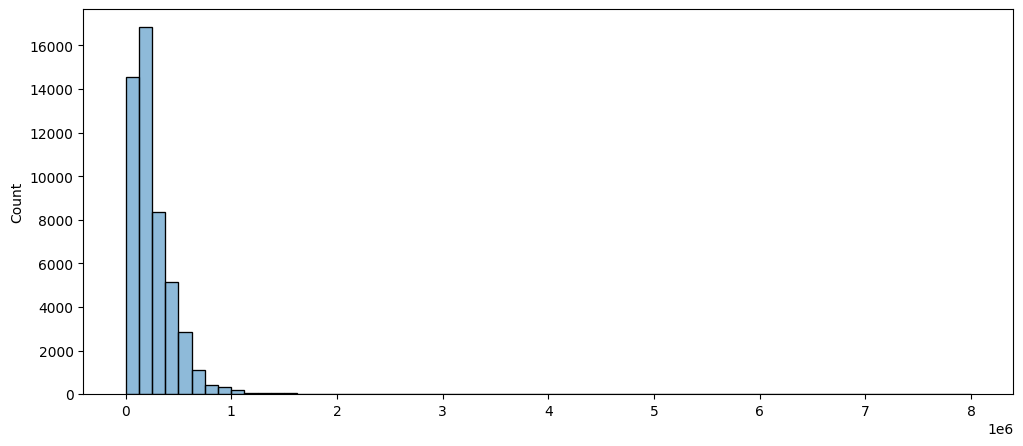

In [11]:
plt.figure(figsize=(12, 5))
sns.histplot(origination.select('balance'), bins=64, legend=False)

plt.show()
plt.close()

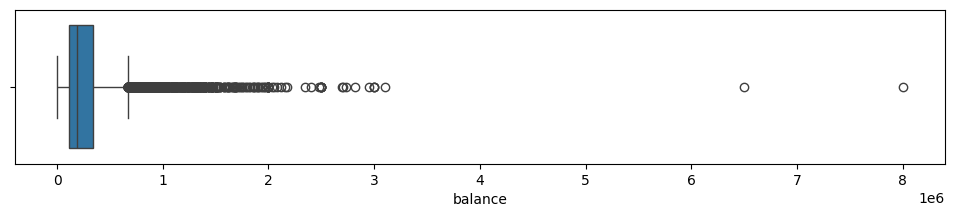

In [12]:
plt.figure(figsize=(12, 2))
sns.boxplot(origination.select('balance'), x='balance')

plt.show()
plt.close()

---

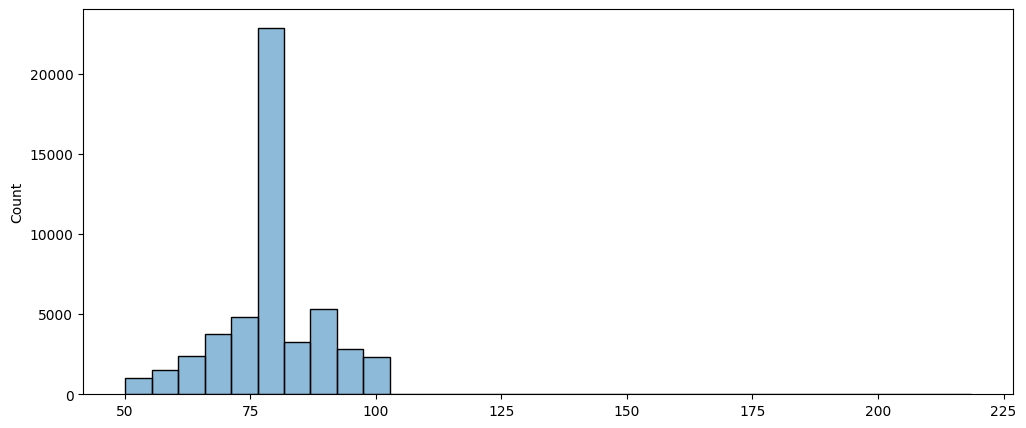

In [13]:
plt.figure(figsize=(12, 5))
sns.histplot(origination.select('ratio_value_loan'), bins=32, legend=False)

plt.show()
plt.close()

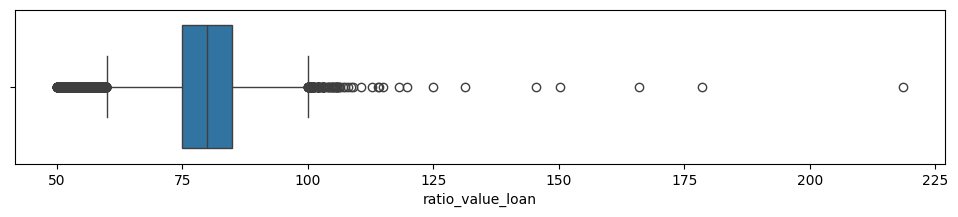

In [14]:
plt.figure(figsize=(12, 2))
sns.boxplot(origination.select('ratio_value_loan'), x='ratio_value_loan')

plt.show()
plt.close()

---

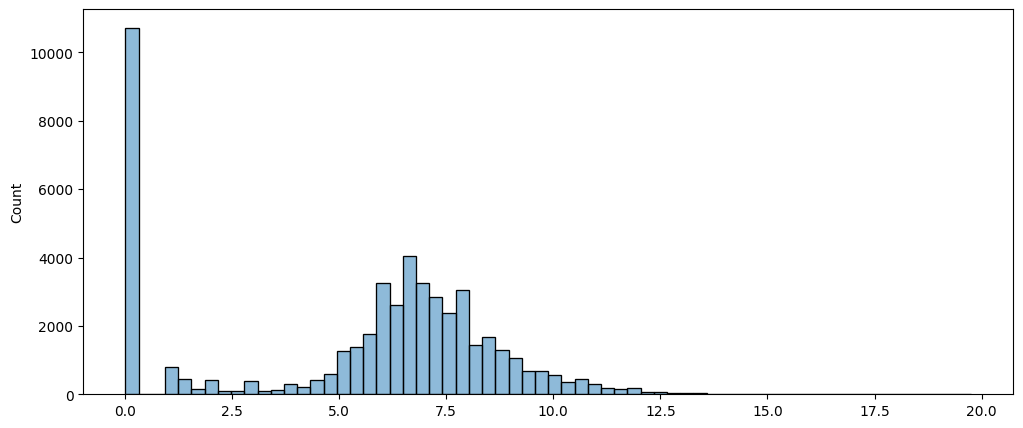

In [15]:
plt.figure(figsize=(12, 5))
sns.histplot(origination.select('interest'), bins=64, legend=False)

plt.show()
plt.close()

---

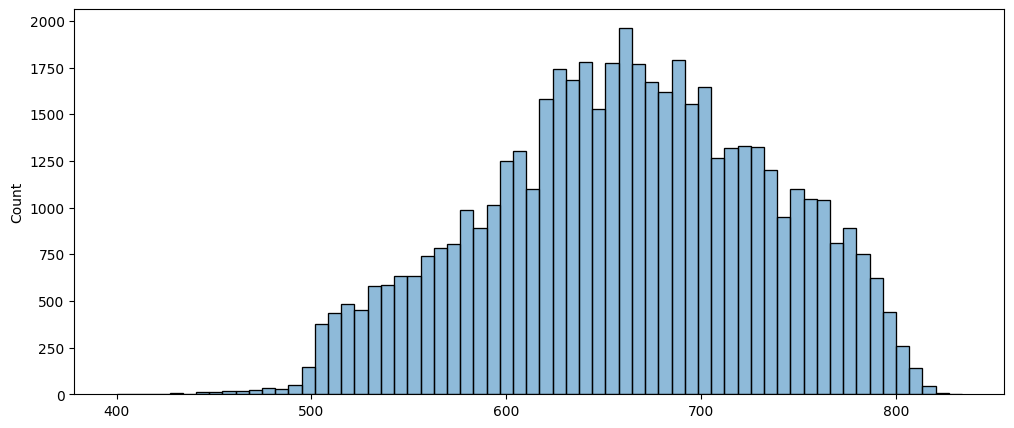

In [16]:
plt.figure(figsize=(12, 5))
sns.histplot(origination.select('fico'), bins=64, legend=False)

plt.show()
plt.close()

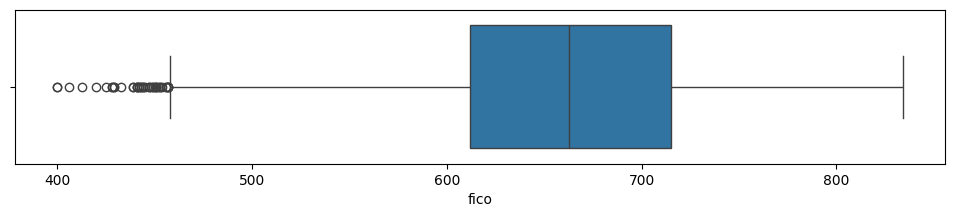

In [17]:
plt.figure(figsize=(12, 2))
sns.boxplot(origination.select('fico'), x='fico')

plt.show()
plt.close()

---

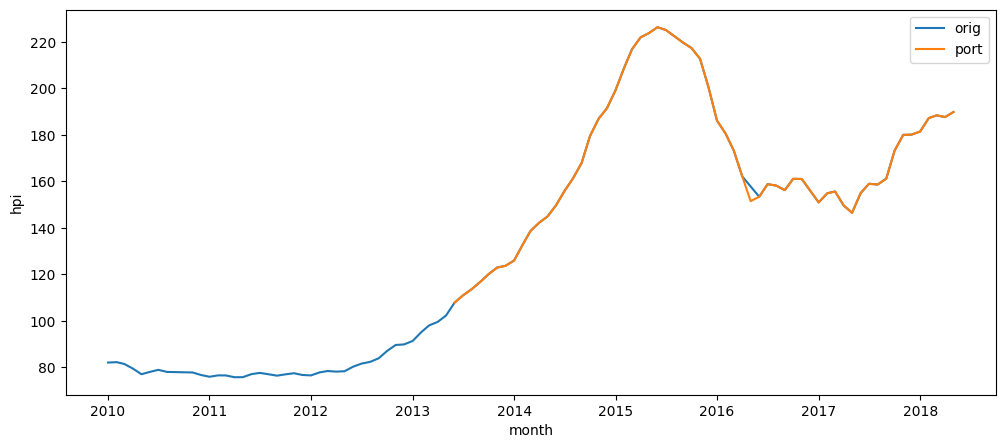

In [18]:
series_hpi_orig = (
    origination
    .select(['month', 'hpi'])
    .unique()
    .sort('month')
    .with_columns(month=pl.col('month').str.to_date('%Y%m'))
)

series_hpi_port = (
    portfolio
    .select(['month', 'hpi'])
    .unique()
    .sort('month')
    .with_columns(month=pl.col('month').str.to_date('%Y%m'))
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=series_hpi_orig, x='month', y='hpi', label='orig')
sns.lineplot(data=series_hpi_port, x='month', y='hpi', label='port')
plt.show()
plt.close()

---

In [19]:
credit_cycle = (
    portfolio
    .select(['month', 'id_borrower', 'id_contract', 'status'])
    .join(
        origination.select(['id_contract', pl.col('month').alias('orig_month')]),
        on='id_contract', how='left',
    )
    .sort('month')
    .filter(
        (pl.col('orig_month') >= portfolio.select(pl.min('month')).item())
        & (pl.col('orig_month') <= portfolio.select(pl.max('month')).item())
    )
    .with_columns(
        flag_default=(pl.col('status') == 'default').cast(pl.UInt8),
    )
)

In [20]:
matrix = (
    credit_cycle
    .pivot(
        values='flag_default', aggregate_function=pl.sum('flag_default'),
        index='orig_month',
        columns='month',
    )
    .sort('orig_month')
)

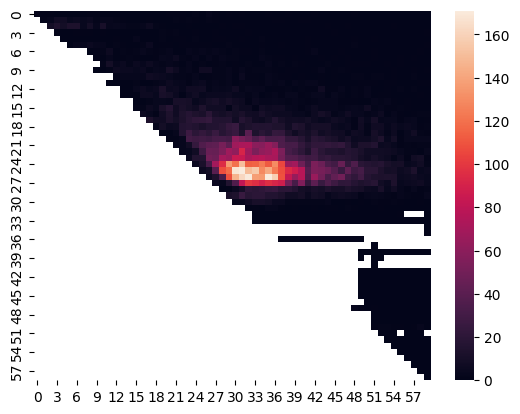

In [21]:
sns.heatmap(matrix.drop('orig_month').to_numpy())
plt.show()
plt.close()

In [22]:
credit_cycle.select(pl.col('month').unique()).shape

(60, 1)

In [23]:
id_month = (
    credit_cycle
    .select(pl.col('month').unique())
    .sort('month')
    .with_columns(
        id_month=1 + pl.int_range(pl.len()),
    )
)

matrix_ids = (
    credit_cycle
    .with_columns(
        id_month=1 + pl.int_range(pl.len()).over(['id_borrower', 'id_contract']),
    )
    .join(id_month.rename({'id_month': 'id_orig_month'}), left_on='orig_month', right_on='month', how='left')
    .pivot(
        values='flag_default', aggregate_function=pl.sum('flag_default'),
        index='id_orig_month',
        columns='id_month',
    )
    .sort('id_orig_month')
)

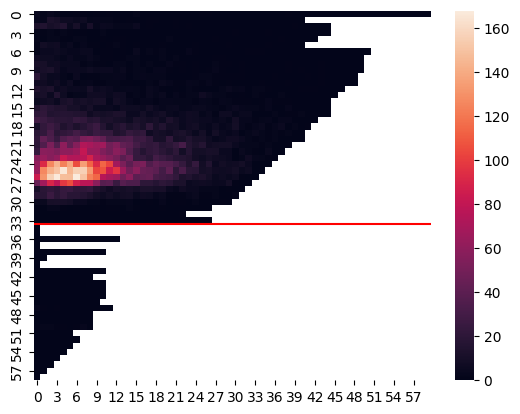

In [24]:
sns.heatmap(matrix_ids.drop('id_orig_month').to_numpy())
plt.axhline(34, color='red')
plt.show()
plt.close()

In [ ]:
matrix.slice(offset=0, length=34).select(pl.col('orig_month').max())

In [ ]:
month_min = '201306'
month_max = '201603'

portfolio = portfolio.filter(pl.col('month') <= month_max)
origination = origination.filter(pl.col('month') <= month_max, pl.col('month') >= month_min)

In [ ]:
for feat_cat in ['type_house', 'type_region', 'type_size', 'investor']:

    display(
        origination
        .select(feat_cat)
        .to_series()
        .value_counts()
        .with_columns(percentage=pl.col('count') / pl.sum('count'))
        .sort('count')
    )

In [ ]:
series_gdp = (
    portfolio
    .select(['month', 'gdp'])
    .unique()
    .sort('month')
    .with_columns(month=pl.col('month').str.to_date('%Y%m'))
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=series_gdp, x='month', y='gdp')
plt.show()
plt.close()

In [ ]:
series_balance = (
    portfolio
    .select(['month', 'balance'])
    .sort('month')
    .with_columns(month=pl.col('month').str.to_date('%Y%m'))
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=series_balance, x='month', y='balance')
plt.show()
plt.close()

In [ ]:
series_contract_count = (
    portfolio
    .group_by('month')
    .agg(pl.n_unique('id_contract').alias('count_unique'))
    .sort('month')
    .with_columns(month=pl.col('month').str.to_date('%Y%m'))
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=series_contract_count, x='month', y='count_unique')
plt.show()
plt.close()

In [ ]:
series_uer = (
    portfolio
    .select(['month', 'uer'])
    .unique()
    .sort('month')
    .with_columns(month=pl.col('month').str.to_date('%Y%m'))
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=series_uer, x='month', y='uer')
plt.show()
plt.close()

In [ ]:
(
    portfolio
    .select('status')
    .to_series()
    .sort()
    .value_counts()
)

In [ ]:
date_test = '2015-09'

In [ ]:
contract_status = (
    portfolio
    .select(['month', 'status'])
    .with_columns(
        (pl.col('status') == 'active').alias('active'),
        (pl.col('status') == 'payoff').alias('payoff'),
        (pl.col('status') == 'default').alias('default'),
    )
    .group_by('month')
    .agg(
        pl.sum('active').cast(pl.Int16),
        pl.sum('payoff').cast(pl.Int16),
        pl.sum('default').cast(pl.Int16),
    )
    .sort('month')
    .with_columns(month=pl.col('month').str.to_date('%Y%m'))
    .melt(id_vars='month', value_vars=['active', 'payoff', 'default'])
)

In [ ]:
fig = plt.figure(figsize=(16, 5))
sns.barplot(contract_status.to_pandas(), x='month', y='value', hue='variable', errorbar=None)
plt.axvline(date_test + '-01', color='red', alpha=.5, zorder=0, linewidth=3)
plt.xticks(rotation=45)
plt.show()
plt.close()